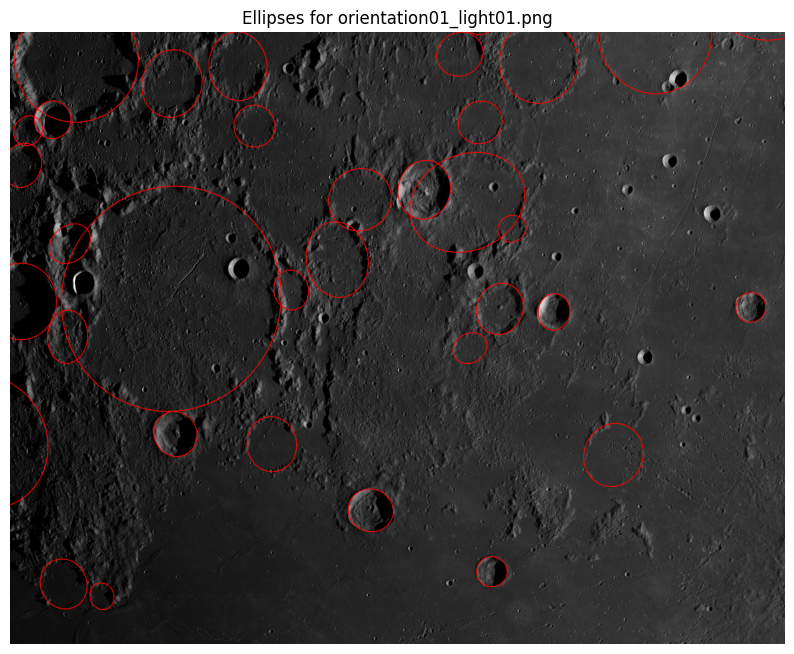

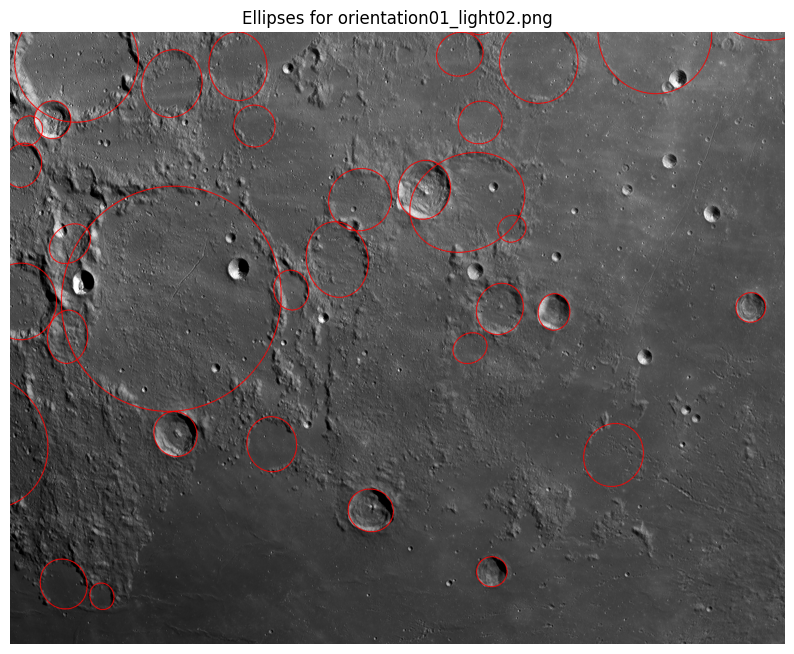

In [42]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define file paths
image_folder = r'D:\datashare\train\train\altitude01\longitude02'
csv_path = r'D:\datashare\train\train\altitude01\longitude02\truth\detections.csv'

# Load the CSV once (no need to reload for every image)
df = pd.read_csv(csv_path)

image_count = 0  # counter

for _file in os.listdir(image_folder):

    # Stop after first two images
    if image_count >= 2:
        break

    # Process only PNG images
    if not _file.lower().endswith('.png'):
        continue

    img_path = os.path.join(image_folder, _file)
    img = cv2.imread(img_path)

    # Check if image was loaded successfully
    if img is None:
        print(f"Warning: Could not load image: {img_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    filename_no_ext = os.path.splitext(_file)[0]  # e.g. orientation01_light01

    # Match rows in CSV
    matched_rows = df[df['inputImage'].str.contains(filename_no_ext, na=False)]

    if matched_rows.empty:
        print(f"No records found for {filename_no_ext}")
    else:
        for _, row in matched_rows.iterrows():
            center = (
                int(row['ellipseCenterX(px)']),
                int(row['ellipseCenterY(px)'])
            )
            axes = (
                int(row['ellipseSemimajor(px)']),
                int(row['ellipseSemiminor(px)'])
            )
            angle = row['ellipseRotation(deg)']

            cv2.ellipse(
                img_rgb,
                center,
                axes,
                angle,
                0,
                360,
                (255, 0, 0),
                2
            )

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title(f"Ellipses for {_file}")
    plt.axis('off')
    plt.show()

    image_count += 1


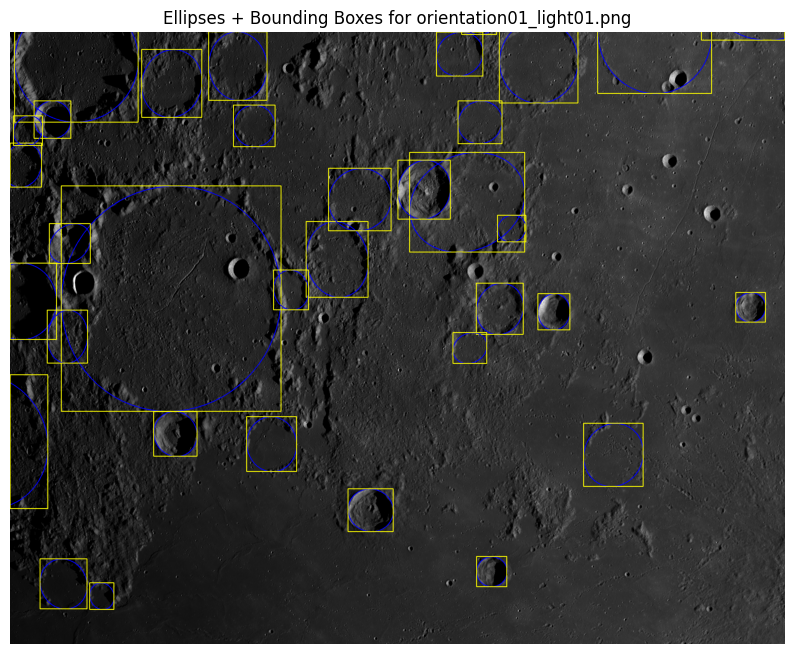

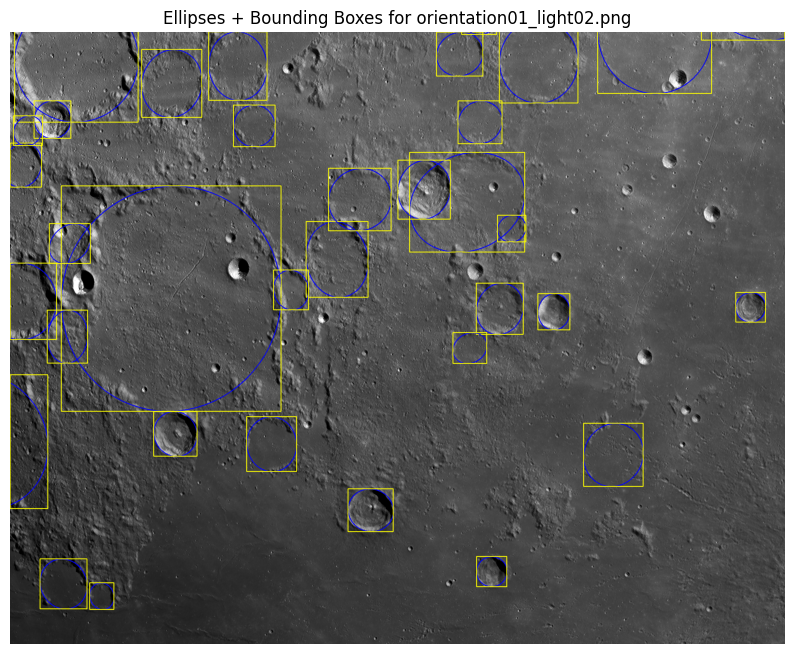

In [43]:
import cv2
import pandas as pd
import os
import math
import matplotlib.pyplot as plt

# Paths
image_folder = r'D:\datashare\train\train\altitude01\longitude02'
csv_path = r'D:\datashare\train\train\altitude01\longitude02\truth\detections.csv'

# Load CSV once
df = pd.read_csv(csv_path)

image_count = 0  # process only first two images

for _file in sorted(os.listdir(image_folder)):

    if image_count >= 2:
        break

    if not _file.lower().endswith('.png'):
        continue

    img_path = os.path.join(image_folder, _file)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Warning: Could not load image: {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    filename_no_ext = os.path.splitext(_file)[0]

    matched_rows = df[df['inputImage'].str.contains(filename_no_ext, na=False)]

    if matched_rows.empty:
        print(f"No records found for {filename_no_ext}")
    else:
        for _, row in matched_rows.iterrows():

            cx = int(row['ellipseCenterX(px)'])
            cy = int(row['ellipseCenterY(px)'])
            a = int(row['ellipseSemimajor(px)'])
            b = int(row['ellipseSemiminor(px)'])
            angle_deg = float(row['ellipseRotation(deg)'])

            # ---- Draw ellipse (BLUE) ----
            cv2.ellipse(
                img_rgb,
                (cx, cy),
                (a, b),
                angle_deg,
                0,
                360,
                (0, 0, 255),
                2
            )

            # ---- Compute ellipse AABB ----
            theta = math.radians(angle_deg)

            dx = math.sqrt((a * math.cos(theta)) ** 2 +
                           (b * math.sin(theta)) ** 2)
            dy = math.sqrt((a * math.sin(theta)) ** 2 +
                           (b * math.cos(theta)) ** 2)

            x1 = int(max(0, cx - dx))
            y1 = int(max(0, cy - dy))
            x2 = int(min(img_rgb.shape[1] - 1, cx + dx))
            y2 = int(min(img_rgb.shape[0] - 1, cy + dy))

            # ---- Draw bounding box (YELLOW) ----
            cv2.rectangle(
                img_rgb,
                (x1, y1),
                (x2, y2),
                (255, 255, 0),
                2
            )

    # Display
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title(f"Ellipses + Bounding Boxes for {_file}")
    plt.axis('off')
    plt.show()

    image_count += 1
